In [23]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.graph_objects as go

In [24]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("Resources/survey.csv",
                 index_col="Timestamp",
                 parse_dates=True
                )

# Preview the dataset
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [25]:
df.shape

(1259, 26)

In [26]:
print('check for null values')
df.isna().sum()

check for null values


Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [27]:
print('check for null values')
df.isna().sum()

check for null values


Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [28]:
my_df = df[['work_interfere','benefits','care_options','wellness_program','seek_help','leave','mental_health_consequence','phys_health_consequence','family_history','treatment',
            'remote_work','tech_company','anonymity','coworkers','supervisor','mental_health_interview', 'phys_health_interview','mental_vs_physical','obs_consequence']]

my_df['work_interfere'] = my_df['work_interfere'].fillna('Unknown')

def handle_uncertain_values(df, columns_to_check):
    replace_dict = {
        "Don't know": "Unknown",
        "Not sure": "Unknown",
        "NaN": "Unknown"
        
    }
    
    for col in columns_to_check:
        if my_df[col].dtype == 'object':  # For categorical columns
            my_df[col] = my_df[col].replace(replace_dict)
        else:  # For numeric columns
            my_df[col] = pd.to_numeric(my_df[col].replace(replace_dict, np.nan), errors='coerce')
    return df

# List of columns to check for uncertain values
columns_to_check = my_df.columns  # You can specify a subset of columns if needed

# Apply the function to handle uncertain values
df = handle_uncertain_values(df, columns_to_check)

# Print info about missing values
print(my_df.isnull().sum())


work_interfere               0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
family_history               0
treatment                    0
remote_work                  0
tech_company                 0
anonymity                    0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2735328946.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2735328946.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
#Changing values to fit the Y/N/Maybe numerical system i build later
condense_mapping = {
    'Somewhat easy': 'Easy',
    'Very easy': 'Easy',
    'Somewhat difficult': 'Difficult',
    'Very difficult': 'Difficult'
}
my_df['leave'] = my_df['leave'].replace(condense_mapping)

#Same as above
fun_mapping = {'Some of them':'Maybe'}

my_df['coworkers'] = my_df['coworkers'].replace(fun_mapping)

#changing work interfere into y/n as oppposed to 4 answers to help with correlation w/ small sample size
silly_mapping = {
    'Never': 'No',
    'Rarely': 'No',
    'Sometimes': 'Yes',
    'Often': 'Yes'
}
my_df['work_interfere'] = my_df['work_interfere'].replace(silly_mapping)


my_df


C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2130622779.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2130622779.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2130622779.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,work_interfere,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,family_history,treatment,remote_work,tech_company,anonymity,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Timestamp,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,Yes,Yes,Unknown,No,Yes,Easy,No,No,No,Yes,No,Yes,Yes,Maybe,Yes,No,Maybe,Yes,No
2014-08-27 11:29:37,No,Unknown,No,Unknown,Unknown,Unknown,Maybe,No,No,No,No,No,Unknown,No,No,No,No,Unknown,No
2014-08-27 11:29:44,No,No,No,No,No,Difficult,No,No,No,No,No,Yes,Unknown,Yes,Yes,Yes,Yes,No,No
2014-08-27 11:29:46,Yes,No,Yes,No,No,Difficult,Yes,Yes,Yes,Yes,No,Yes,No,Maybe,No,Maybe,Maybe,No,Yes
2014-08-27 11:30:22,No,Yes,No,Unknown,Unknown,Unknown,No,No,No,No,Yes,Yes,Unknown,Maybe,Yes,Yes,Yes,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-12 11:17:21,Unknown,No,No,No,No,Easy,No,No,No,Yes,No,Yes,Unknown,Maybe,Some of them,No,No,Unknown,No
2015-09-26 01:07:35,Yes,Yes,Yes,No,No,Difficult,No,No,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,No,No,Yes,No
2015-11-07 12:36:58,Yes,Yes,Yes,No,No,Difficult,Yes,Yes,Yes,Yes,No,Yes,Unknown,No,No,No,No,No,No


C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2792759200.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2792759200.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\2792759200.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,work_interfere_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,family_history_encoded,treatment_encoded,remote_work_encoded,tech_company_encoded,anonymity_encoded,coworkers_encoded,supervisor_encoded,obs_consequence_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded
work_interfere_encoded,1.000000,-0.055287,0.062836,-0.044958,-0.087846,-0.159728,0.149519,0.056958,0.228729,0.401127,0.035524,0.006273,-0.027967,0.003036,-0.057653,0.125752,-0.052989,0.054702,-0.137598
benefits_encoded,-0.055287,1.000000,0.352915,0.439193,0.551535,0.225805,-0.050123,-0.086812,0.156482,0.155897,-0.120223,-0.105018,0.389723,0.021817,0.064048,-0.049207,-0.037994,-0.113981,0.150090
care_options_encoded,0.062836,0.352915,1.000000,0.354133,0.390809,0.037291,-0.026021,0.005096,0.125619,0.278839,0.012624,-0.031537,0.241460,0.035060,0.113989,0.084167,0.013051,-0.037578,0.080235
wellness_program_encoded,-0.044958,0.439193,0.354133,1.000000,0.721095,0.183549,-0.089877,-0.014531,0.047738,0.078018,-0.061685,-0.140112,0.273052,0.066198,0.147645,0.067871,-0.008538,-0.050342,0.296709
seek_help_encoded,-0.087846,0.551535,0.390809,0.721095,1.000000,0.157697,-0.130414,-0.057017,0.065877,0.082636,-0.054195,-0.156059,0.275376,0.050786,0.165679,0.053636,0.017440,-0.050156,0.324555
leave_encoded,-0.159728,0.225805,0.037291,0.183549,0.157697,1.000000,-0.444882,-0.279217,-0.064382,-0.159103,-0.008502,0.065386,0.380010,0.223455,0.410492,-0.293596,0.143168,0.019301,0.530768
mental_health_consequence_encoded,0.149519,-0.050123,-0.026021,-0.089877,-0.130414,-0.444882,1.000000,0.515619,0.097756,0.132028,-0.008691,-0.114461,-0.398193,-0.443727,-0.651409,0.229827,-0.301990,-0.075323,-0.562655
phys_health_consequence_encoded,0.056958,-0.086812,0.005096,-0.014531,-0.057017,-0.279217,0.515619,1.000000,0.060130,0.051596,0.024952,-0.046020,-0.313312,-0.227011,-0.382648,0.182175,-0.089832,-0.177647,-0.287550
family_history_encoded,0.228729,0.156482,0.125619,0.047738,0.065877,-0.064382,0.097756,0.060130,1.000000,0.377918,0.014456,-0.046079,-0.045031,-0.000847,0.004159,0.124861,-0.059604,-0.040330,-0.080789
treatment_encoded,0.401127,0.155897,0.278839,0.078018,0.082636,-0.159103,0.132028,0.051596,0.377918,1.000000,0.026937,-0.031525,0.016970,0.068433,-0.041834,0.156972,-0.048545,0.006225,-0.084370


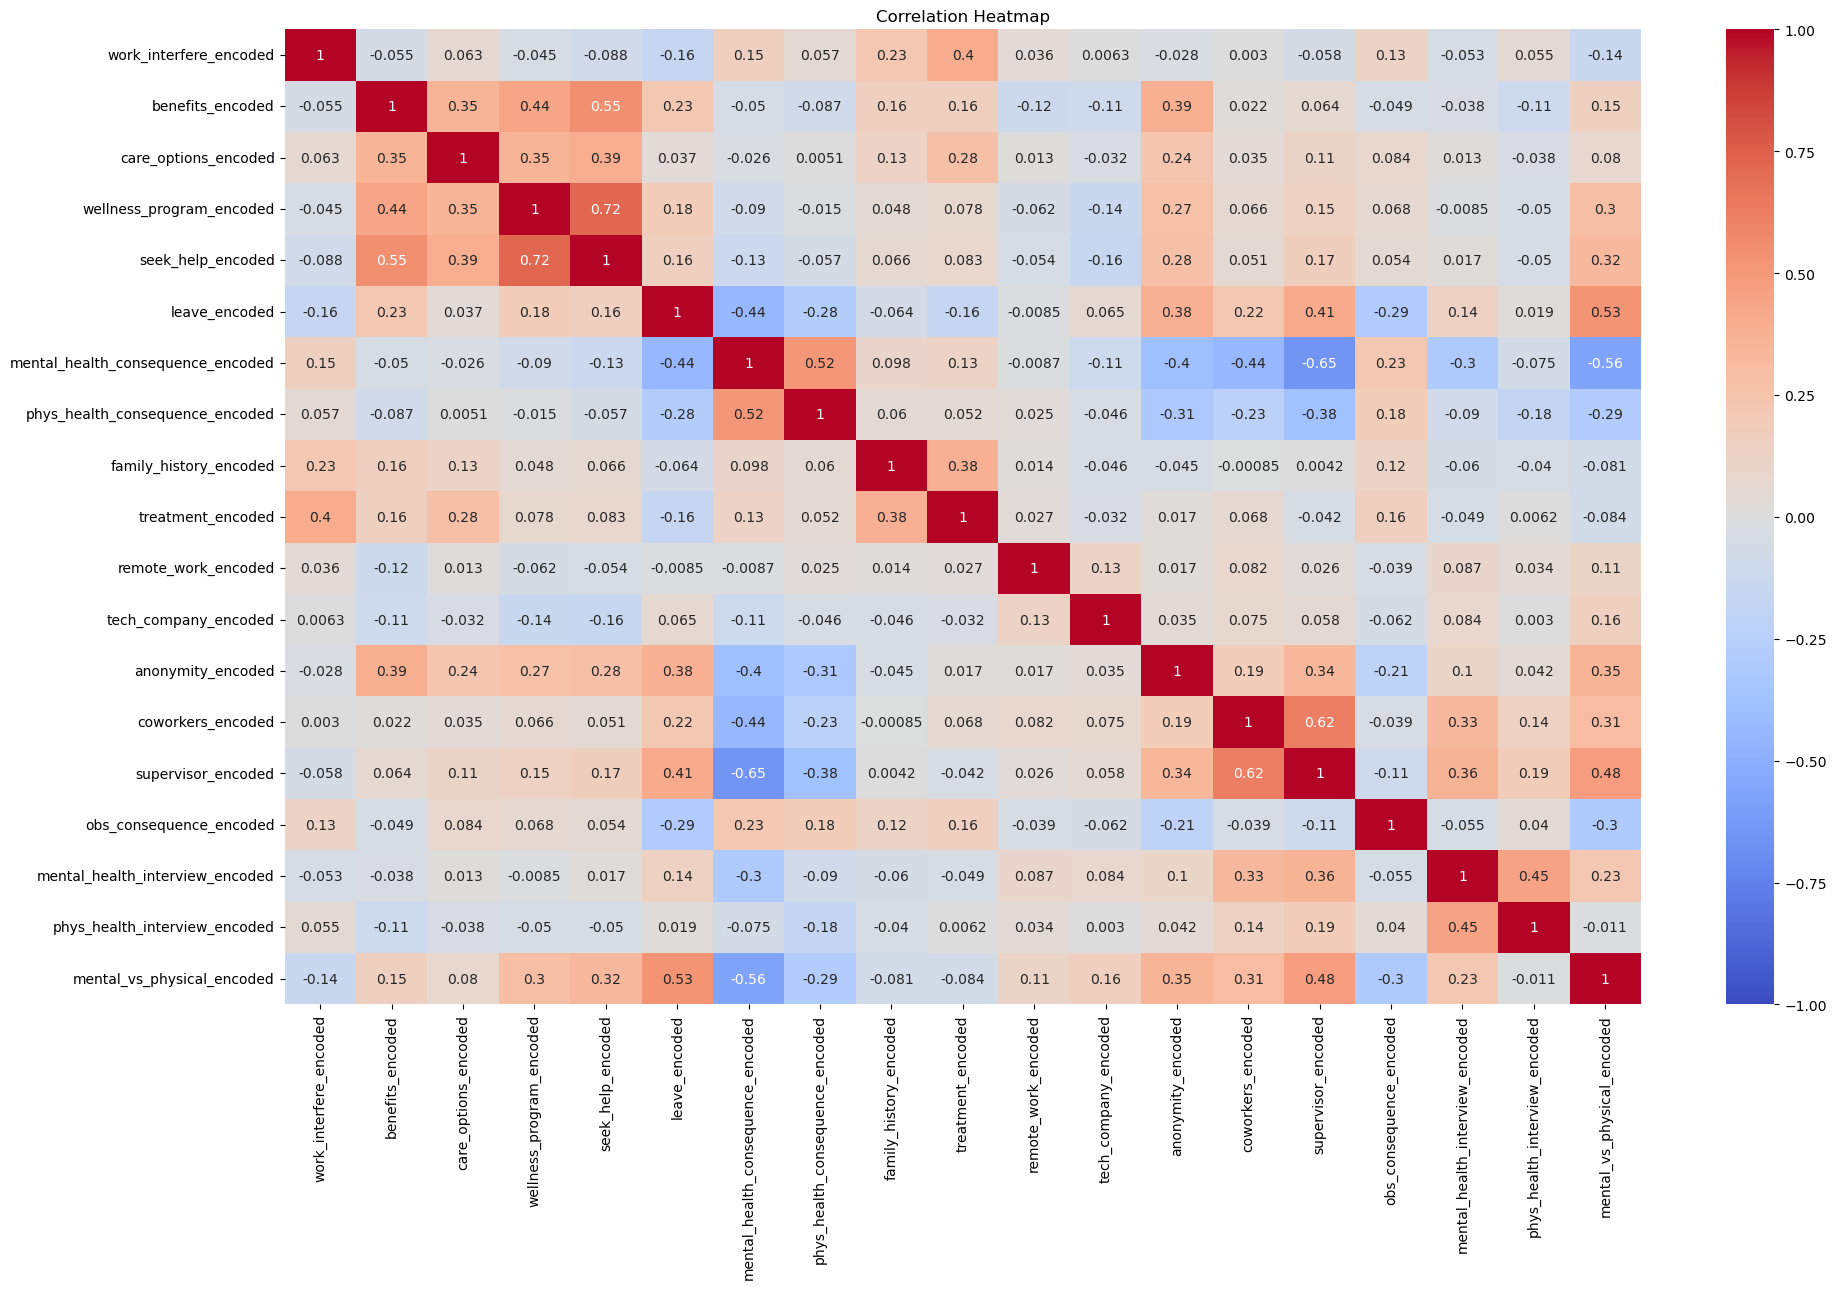

In [30]:
#Dictionaries for maps I will be applying to all of my new columns. 
map1 = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
map2 = {'No': 0, 'Maybe': 1, 'Yes': 2}
map3 = {'No': 0, 'Yes': 2}
map4 = {'Difficult':0, 'Easy':2}

#Creating new columns by applying the map function to referenced column, converting all words to numbers 0-2
#there is surely a way to automate this, 
my_df['work_interfere_encoded'] = my_df['work_interfere'].map(map3)
my_df['benefits_encoded'] = my_df['benefits'].map(map3)
my_df['care_options_encoded'] = my_df['care_options'].map(map3)
my_df['wellness_program_encoded'] = my_df['wellness_program'].map(map3)
my_df['seek_help_encoded'] = my_df['seek_help'].map(map3)
my_df['leave_encoded'] = my_df['leave'].map(map4)
my_df['mental_health_consequence_encoded'] = my_df['mental_health_consequence'].map(map2)
my_df['phys_health_consequence_encoded'] = my_df['phys_health_consequence'].map(map2)
my_df['work_interfere_encoded'] = my_df['work_interfere'].map(map3)
my_df['family_history_encoded'] = my_df['family_history'].map(map3)
my_df['treatment_encoded'] = my_df['treatment'].map(map3)
my_df['remote_work_encoded'] = my_df['remote_work'].map(map3)
my_df['tech_company_encoded'] = my_df['tech_company'].map(map3)
my_df['anonymity_encoded'] = my_df['anonymity'].map(map3)
my_df['coworkers_encoded'] = my_df['coworkers'].map(map2)
my_df['supervisor_encoded'] = my_df['supervisor'].map(map3)
my_df['obs_consequence_encoded'] = my_df['obs_consequence'].map(map3)
my_df['mental_health_interview_encoded'] = my_df['mental_health_interview'].map(map2)
my_df['phys_health_interview_encoded']  = my_df['phys_health_interview'].map(map2)
my_df['mental_vs_physical_encoded'] = my_df['mental_vs_physical'].map(map3)


#selecting all the numeric(encoded) columns i just created and making a new numbers only df
numeric_columns = my_df.select_dtypes(include=[np.number]).columns
my_encoded_df = my_df[numeric_columns]

#matrix using df we just created, min_periods=1 allows it to pass over "Unknown" values, which helps a ton. Previously i was just dropping every 
#instance of "unknown" which reduced the df from 1200 to 150.
my_correlation_matrix = my_encoded_df.corr(method='pearson', min_periods=1)

          
display(my_correlation_matrix)

plt.figure(figsize=(20, 13))
sns.heatmap(my_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()





In [31]:
#This code turns every float to a positive and then sums by row. Printed are the rows in descending order.


positive_array = np.abs(my_correlation_matrix)
row_sums = np.sum(positive_array, axis=1)


sorted_indices = np.argsort(row_sums)[::-1]

# Sort the row sums in descending order
sorted_row_sums = row_sums[sorted_indices]

# Print the sorted results
print("Total Sum of Positive Entries by Row (Sorted in Descending Order):")
for idx in sorted_indices:
    print(f"Row {idx}: {sorted_row_sums[np.where(sorted_indices == idx)[0][0]]}")

Total Sum of Positive Entries by Row (Sorted in Descending Order):
Row 18: 5.488327686264279
Row 6: 5.422515510643148
Row 14: 5.215064607014536
Row 5: 4.786331696973377
Row 12: 4.646736046912631
Row 4: 4.392806046766486
Row 1: 4.126151080308441
Row 3: 4.085243832761014
Row 13: 3.920989658491467
Row 7: 3.8581242873775032
Row 16: 3.465379921717577
Row 2: 3.283260243016443
Row 15: 3.2193011084212317
Row 9: 3.1989718596831507
Row 0: 2.748481309291299
Row 8: 2.640787241556806
Row 17: 2.53430653847465
Row 11: 2.3507324561559706
Row 10: 1.8961276100377484


C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\3762039168.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Connor\AppData\Local\Temp\ipykernel_25288\3762039168.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [32]:


# HIGHEST CORRELATIONS
# .72
# wellness_program
# Has your employer ever discussed 
# mental health as part of an employee wellness program?
# BY
# seek_help
# Does your employer provide resources to 
# learn more about mental health issues and how to seek help?

# -0.65
# mental_health_consequence
# Do you think that discussing a mental health issue with 
# your employer would have negative consequences?
# BY
# supervisor
# Would you be willing to discuss a mental health issue with your direct supervisor?

# -0.62
# supervisor
# Would you be willing to discuss a mental health issue with your direct supervisor?
# BY
# coworkers
# Would you be willing to discuss a mental health issue with your coworkers?

# COLUMNS WITH HIGHEST TOTAL CORRELATION - USES ABOVE CODE - ALL CORRS POSITIVE AND SUMMED BY ROW

# mental_vs_physical
# mental_health_consequence(most varied row, consistent values throughout
# supervisor
# leave
# anonymity')


In [33]:
my_correlation_matrix.dtypes

work_interfere_encoded               float64
benefits_encoded                     float64
care_options_encoded                 float64
wellness_program_encoded             float64
seek_help_encoded                    float64
leave_encoded                        float64
mental_health_consequence_encoded    float64
phys_health_consequence_encoded      float64
family_history_encoded               float64
treatment_encoded                    float64
remote_work_encoded                  float64
tech_company_encoded                 float64
anonymity_encoded                    float64
coworkers_encoded                    float64
supervisor_encoded                   float64
obs_consequence_encoded              float64
mental_health_interview_encoded      float64
phys_health_interview_encoded        float64
mental_vs_physical_encoded           float64
dtype: object